# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [80]:
import pandas as pd
# df = pd.read_csv('train.csv')
# df.describe()

def read_data(path):
    df = pd.read_csv(path)
    return df

path = 'train.csv'
df = read_data(path)
# print(df)
df.describe()
# print(df.iloc[0])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [81]:
def num_nans(df):
    return df.isna().any(axis = 1).sum()

# 891 x 12
num_nans(df)
print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [82]:
# import numpy as np

# method with for loop
# def drop_na(df):
#     columns = list(df) # ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
#     for col in columns:
#         # print(df[col].notna().sum()) # not enmpty
#         if df[col].notna().sum() < len(df) - 200:
#             df.drop([col], axis = 1, inplace = True)
#     return df

def drop_na(df):
    return df.dropna(axis = 1, thresh = len(df)-200)


# df = pd.read_csv('train.csv')
df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [83]:
def to_numerical(df):
    df['Sex'].replace('male', 0, inplace = True)
    df['Sex'].replace('female', 1, inplace = True)
    return df['Sex']

# df = pd.read_csv('train.csv')
print(df['Sex'])
df['Sex'] = to_numerical(df)
df.head()
print(df['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [87]:
def extract_names(df):
    name_tmp1 = df['Name'].str.split(',').apply(pd.Series)
    cols = list(name_tmp1.columns.values)
    name_tmp1.rename(columns = {cols[0]: "Last name", cols[1]: "Name"}, inplace = True)
    name_tmp2 = name_tmp1[name_tmp1.columns.values[1]].str.findall("\w+").apply(pd.Series)
    cols = list(name_tmp2.columns.values)
    name_tmp2.rename(columns = {cols[0]: "Title", cols[1]: "First name", cols[2]: "Middle name"}, inplace = True)
    name = pd.concat([name_tmp1, name_tmp2], axis = 1)
    name = name.drop(columns = 'Name').iloc[:, :4]
    name = name[["First name", "Middle name", "Last name", "Title"]]
    return name

# df = pd.read_csv('train.csv')
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()
# print(df['Name'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,William,Henry,Allen,Mr


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [42]:
def replace_with_mean(df):
    average = df['Age'].mean()
    df['Age'].fillna(average, inplace = True) # fill empty
    return df['Age']

# df = pd.read_csv('train.csv')
print(df['Age'])
df['Age'] = replace_with_mean(df)
df.head()
print(df['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

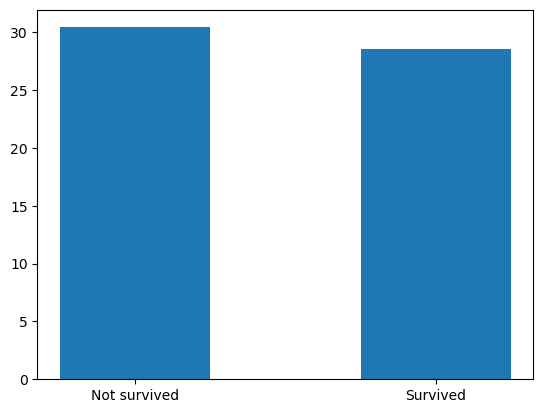

In [43]:
import matplotlib.pyplot as plt


# num = df['Survived'].value_counts() # value_counts() 
# print(num)

die_age = df.loc[df['Survived'] == 0]['Age'].mean()
survived_age = df[df['Survived'] == 1]['Age'].mean()
# print(die_age, survived_age,)

data = [die_age, survived_age]
labels = ['Not survived', 'Survived']
plt.bar(range(len(data)), data, width = 0.5, tick_label = labels)
plt.show()

-> your answer here 

Comment: As can be seen from the graph, the average age of those who did not survive was a bit older. Average age of not survived is older than 30 but the survived is younger than 30, about 28.



h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

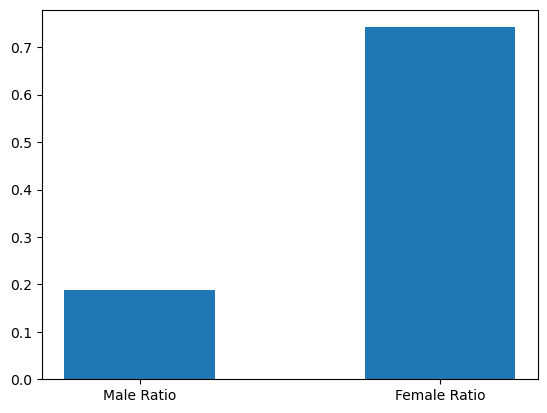

In [44]:
# your code here

df_h = pd.read_csv('train.csv')

sex = df_h['Sex'].value_counts() # male: 577, female: 314
#print(sex)
survived = df_h[df_h['Survived'] == 1]['Sex'].value_counts()
#print(survived)

male_ratio = survived['male'] / sex['male']
female_ratio = survived['female'] / sex['female']
ratio = [male_ratio, female_ratio]
#print(male_ratio)
labels = ['Male Ratio', 'Female Ratio']
plt.bar(range(len(ratio)), ratio, width = 0.5, tick_label = labels)
plt.show()

-> your answer here

Comment: Women are more likely to survive than men. More women survive than men. There are nearly twice as many surviving females as surviving males.

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

<AxesSubplot:xlabel='Title'>

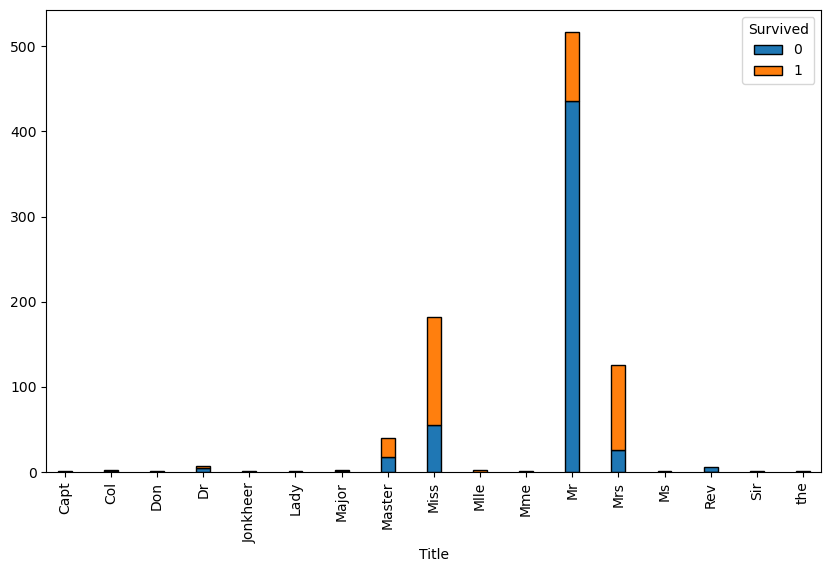

In [45]:
# your code here
# df = pd.read_csv('train.csv')
# #survived = df[df['Survived'] == 1]['Pclass'].value_counts()
# print(df['Name'])
# df1 = df['Name'].str.split(',')
# print(df1)
# title = str(df1[0]).split('.')
# print(title)
# # plt.bar(range(len(survived)), survived, width = 0.5)
# # plt.show()

title_survive = df[["Title","Survived"]]
title_survive1 = pd.crosstab(index = title_survive["Title"], columns = title_survive["Survived"])
title_survive2 = pd.crosstab(index = title_survive["Title"], columns = title_survive["Survived"], normalize = "index")  
fig, ax = plt.subplots(figsize = (10,6))
title_survive1.plot(kind = 'bar', 
                    stacked = True, 
                    ax = ax, 
                    width = 0.3,
                    edgecolor = "black")

-> your answer here

We can find that people with the titles Miss and Mrs have a higher chance of surviving. The survival rate of Mr is very low. On the whole, the people with title Miss, Mrs or Mr account for the majority.

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

48.39540760233917
22.117886885245877


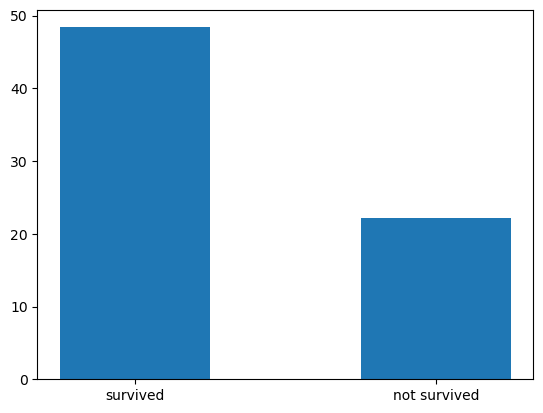

In [46]:
# your code here
# df = pd.read_csv('train.csv')
survived_fare = df[df['Survived'] == 1]['Fare'].mean()
print(survived_fare)
die_fare = df[df['Survived'] == 0]['Fare'].mean()
print(die_fare)
data = [survived_fare, die_fare]
labels = ['survived', 'not survived']
plt.bar(range(len(data)), data, width = 0.5, tick_label = labels)
plt.show()

-> your answer here

Comment: The average fare for those who didn't survive was more than half that of those who survived. It seems like that those who bought cheap tickets had lower survival rates.

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 549, dtype: float64


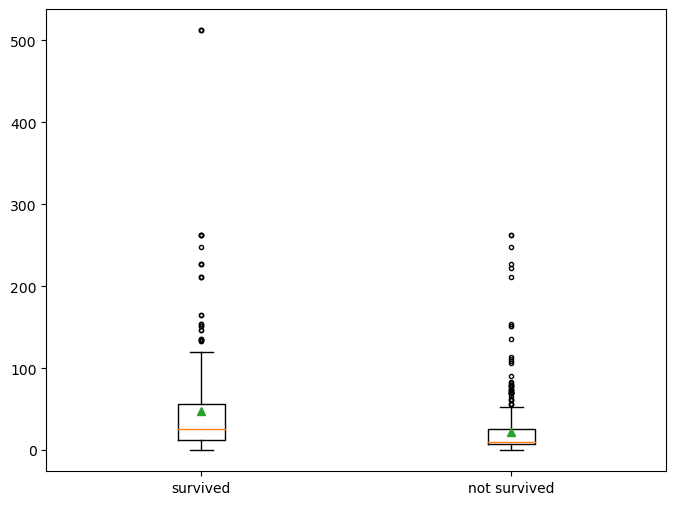

In [47]:
# your code here
# df = pd.read_csv('train.csv')

survived_fare = df[df['Survived'] == 1]['Fare']
die_fare = df[df['Survived'] == 0]['Fare']
print(die_fare)
box1, box2 = survived_fare, die_fare
labels = ['survived', 'not survived']

plt.figure(figsize=(8,6)) # set the size
plt.boxplot([box1, box2], labels = labels, showmeans=True, sym = '.')
plt.show()

-> your answer here

Those who survived had higher average fares. The person with the highest ticket price survived. Some people with fares around the average fare did not survive.

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [48]:
# your code here

def modify_fare(df):
    mean = df['Fare'].mean()
    std = df['Fare'].std()
    return (df['Fare'] - mean) / std

# df = pd.read_csv('train.csv')
df['Fare'] = modify_fare(df)
# df.head()
print(df['Fare'])


0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891, dtype: float64


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [50]:
# from pandas.api.types import is_number
# df = pd.read_csv('train.csv')
# print(df.dtypes)
# print("\n")
# print(df.dtypes)
# print(list(df))

### method 1: with for loop
# def drop_nonnum(df):
#     columns = list(df) # ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
#     for col in columns:
#         if df[col].dtypes == object:
#             df.drop(col, axis = 1, inplace = True)
#     return df

# df = drop_nonnum(df)
# df

### method 2: 
df = df._get_numeric_data()
df





,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.000000,1,0,-0.502163
1,2,1,1,1,38.000000,1,0,0.786404
2,3,1,3,1,26.000000,0,0,-0.488580
3,4,1,1,1,35.000000,1,0,0.420494
4,5,0,3,0,35.000000,0,0,-0.486064
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,-0.386454
887,888,1,1,1,19.000000,0,0,-0.044356
888,889,0,3,1,29.699118,1,2,-0.176164
889,890,1,1,0,26.000000,0,0,-0.044356


m) Ignoring passenger ID, write a function that returns the names of the N most similar pairs of passengers using the euclidean distance? - (15 points)

In [51]:

from queue import PriorityQueue

# function from lab
def euclidean_dist(x, y):
    res = 0
    for i in range(len(x)):
        res += (x[i] - y[i])**2
        return res**(1/2)


def N_most_similar_pairs(df, N):
    # drop passenger ID
    df = df.drop(["PassengerId"], axis = 1)
    # print(df)

    # calculate distance & get the list
    dist = [[0 for i in range(i + 1)] for i in range(len(df))]
    for i in range(len(df)):
        for j in range(i):
            dist[i][j] = euclidean_dist(df.iloc[[i]].values.tolist()[0], df.iloc[[j]].values.tolist()[0])

    # find most similar
    dist_sort = PriorityQueue()
    for i in range(len(df)):
        for j in range(i):
            dist_sort.put((dist[i][j], (i,j)))

    # display the results
    answer  = "\n"
    for i in range(N):
        pairs = ""
        elem = dist_sort.get()
        pairs += str(i+1) + "th most similar pair with distance " + str(elem[0]) + " : passenger" + str(elem[1][0]) + " and passenger" + str(elem[1][1])
        answer += pairs + "\n"
    
    return answer
    

print("The 3 most similar passengers are: " + str(N_most_similar_pairs(df, 3)))

The 3 most similar passengers are: 
1th most similar pair with distance 0.0 : passenger2 and passenger1
2th most similar pair with distance 0.0 : passenger3 and passenger1
3th most similar pair with distance 0.0 : passenger3 and passenger2



## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [113]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        #print('tt')
        return json.loads(response.content.decode('utf-8'))

    return response

python = get("Python")
# print(python)
data_science = get("Data Science")
data_analytics = get("Data Analysis")
machine_learning = get("Machine Learning")
deep_learning = get("Deep Learning")

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [114]:
# your code here

PY_df = pd.json_normalize(python['items'])
PY_df.to_csv("python.csv")

DS_df = pd.json_normalize(data_science['items'])
DS_df.to_csv("Data Science.csv")

DA_df = pd.json_normalize(data_analytics['items'])
DA_df.to_csv("Data Analytics.csv")

ML_df = pd.json_normalize(machine_learning['items'])
ML_df.to_csv("Machine Learning.csv")

DL_df = pd.json_normalize(deep_learning['items'])
DL_df.to_csv("Deep Learning.csv")

c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [115]:
# your code here

PY_df = pd.json_normalize(python['items'])
# print(PY_df)
PY_df.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace = True)
# print(PY_df)

DS_df = pd.json_normalize(data_science['items'])
DS_df.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace = True)

DA_df = pd.json_normalize(data_analytics['items'])
DA_df.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace = True)

ML_df = pd.json_normalize(machine_learning['items'])
ML_df.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace = True)

DL_df = pd.json_normalize(deep_learning['items'])
DL_df.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace = True)


d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [116]:
# your code here

PY_df['Topic'] = "Python"
DS_df['Topic'] = "Data Science"
DA_df['Topic'] = "Data Analysis"
ML_df['Topic'] = "Machine Learning"
DL_df['Topic'] = "Deep Learning"

# print(PY_df)


e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [117]:
# your code here

def Data_row(df):
    data = df.loc[df['Title'].str.contains("Data")] 
    return data


# test cases
print(DS_df['Title'])
data = Data_row(DS_df)
#print(data)
data.head()

# print(PY_df['Title'])
# data1 = Data_row(PY_df)
# print(data1)




0                                 R for Data Science
1                                 Doing Data Science
2                                       Data Science
3                       Python Data Science Handbook
4                       Introduction to Data Science
5    Data Science Programming All-In-One For Dummies
6                          Data Science from Scratch
7                     Build a Career in Data Science
8                  Getting Started with Data Science
9                Programming Skills for Data Science
Name: Title, dtype: object


,kind,id,etag,selfLink,Title,volumeInfo.subtitle,Authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,...,searchInfo.textSnippet,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,accessInfo.pdf.acsTokenLink,Topic
0,books#volume,vfi3DQAAQBAJ,1ay2xVIgWe4,https://www.googleapis.com/books/v1/volumes/vf...,R for Data Science,"Import, Tidy, Transform, Visualize, and Model ...","[Hadley Wickham, Garrett Grolemund]","""O'Reilly Media, Inc.""",2016-12-12,Learn how to use R to turn raw data into insig...,...,Learn how to use R to turn raw data into insig...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science
1,books#volume,vcVKAQAAQBAJ,KqcafmPJRxQ,https://www.googleapis.com/books/v1/volumes/vc...,Doing Data Science,Straight Talk from the Frontline,"[Cathy O'Neil, Rachel Schutt]","""O'Reilly Media, Inc.""",2013-10-09,Now that people are aware that data can make t...,...,But how can you get started working in a wide-...,46.99,USD,46.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,NaN,Data Science
2,books#volume,TFpVDwAAQBAJ,Ma4x+j+WQ74,https://www.googleapis.com/books/v1/volumes/TF...,Data Science,NaN,"[John D. Kelleher, Brendan Tierney]",MIT Press,2018-04-13,A concise introduction to the emerging field o...,...,This volume in the MIT Press Essential Knowled...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science
3,books#volume,6omNDQAAQBAJ,dRhHfbtir7k,https://www.googleapis.com/books/v1/volumes/6o...,Python Data Science Handbook,Essential Tools for Working with Data,[Jake VanderPlas],"""O'Reilly Media, Inc.""",2016-11-21,"For many researchers, Python is a first-class ...",...,"With this handbook, you’ll learn how to use: I...",59.99,USD,59.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,NaN,Data Science
4,books#volume,xb29DwAAQBAJ,4kFFyvJ5BI8,https://www.googleapis.com/books/v1/volumes/xb...,Introduction to Data Science,Data Analysis and Prediction Algorithms with R,[Rafael A. Irizarry],CRC Press,2019-11-20,Introduction to Data Science: Data Analysis an...,...,This book is a textbook for a first course in ...,NaN,NaN,NaN,NaN,NaN,NaN,http://books.google.com/books/download/Introdu...,http://books.google.com/books/download/Introdu...,Data Science


f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [120]:
# your code here

### method with for loop
def E_name(df):
    authors_col = df['Authors']
    result = []
    # each row in Authors columns
    for names_list in authors_col:
        for name_str in names_list:
            names = name_str.split()
            # the first name or the last name
            if names[0].startswith('E') or names[-1].startswith('E'):
                result.append(names_list)
                break
    
    return result

### method without for loop: Sorry. I tried a lot, however I can't figure it out.

#def E_name(df):
# names_list = PY_df['Authors'].apply(lambda x: str(x).split(','))
# names = names_list.apply(lambda names: str(names).split())
# df = names.apply(lambda name: df[df['Authors'] == name] if name.contains('E'))
# print(names_list)
# print('\n')
# print(names)



# test cases
print(PY_df['Authors'])
py = E_name(PY_df)
print(py)

# print(DS_df['Authors']) 
ds = E_name(DS_df)
print(ds)

# print(DA_df['Authors'])
da = E_name(DA_df)
print(da)

# print(ML_df['Authors']) # ['Ethem Alpaydin']
ml = E_name(ML_df)
print(ml)

# print(DL_df['Authors']) # ['Eugene Charniak']
dl = E_name(DL_df)
print(dl)



0                [David M. Beazley]
1        [Stef Maruch, Aahz Maruch]
2                   [Brett Slatkin]
3                    [Justin Seitz]
4                       [Mark Lutz]
5                   [John M. Zelle]
6                [Mark Summerfield]
7                     [Al Sweigart]
8              [Rob Mastrodomenico]
9    [Michał Jaworski, Tarek Ziadé]
Name: Authors, dtype: object
[]
[['Emily Robinson', 'Jacqueline Nolis']]
[]
[['Ethem Alpaydin']]
[['Eugene Charniak']]
